## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

0.6584796119633549
13.357868154866958
4.572104172968435


array([12.58682507])

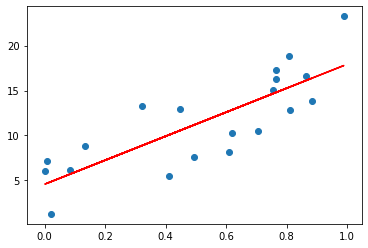

In [2]:
# you code here

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


## generate data
random_data = np.random.random((20,2))
X = random_data[:,0]
# y = random_data[:,1]

def assuming_function(x):
    return 13.4 * x + 5 + random.randint(-5,5)

y = np.array([assuming_function(x) for x in X])


## build linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1,1),y)

print(reg.score(X.reshape(-1,1),y))
print(reg.coef_[0])
print(reg.intercept_)

def f(x):
    return reg.coef_ * x + reg.intercept_


## plot data & regression line
plt.scatter(X,y)
plt.plot(X,f(X),color='red')

## predict new data
reg.predict([[0.6]])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [3]:
# you code here
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

from scipy.spatial.distance import cosine

def distance(x1,x2):
    return cosine(x1,x2)

def predict(x,k=5):
    most_similars = sorted(model(X,y),key=lambda xi: distance(xi[0],x))[:k]
    
    y_hats = [y for x,y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)
    
    
myself_knn = model(X,y)
predict(0.6)

[(0.8113323195668792, 12.871853082196182), (0.6106869489923974, 8.183205116498126), (0.13310725050732497, 8.783637156798154), (0.882996577126553, 13.832154133495813), (0.7539658289273681, 15.103142107626732)]


11.754798319323001

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

### 1. 信息熵

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

### 2. Gini 纯度

$$ Gini = 1 - \sum_{i=1}^J P_i^2 $$

In [27]:
# !pip install icecream

  Created wheel for executing: filename=executing-0.4.1-cp37-none-any.whl size=8302 sha256=c9f253cac7a754a1fb7b4b72494b64e769fd0280d9682dd18bf7243123a11b1d
  Stored in directory: C:\Users\neuro\AppData\Local\pip\Cache\wheels\b0\71\dc\c1bdcd4b384c4458b639dfa905bc093979b8779f2e0df78792
Successfully built executing


In [11]:
# you code here
from collections import Counter
from icecream import ic

def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return -sum(p * np.log(p) for p in probs)

print(entropy([1,1,1,1]))
print(entropy([1,1,1,0]))
print(entropy([2,3,3,3]))
print(entropy([2,3,3,4]))
print(entropy([1,2,2,3]))
print(entropy([1,2,3,4]))

ic| probs: [1.0]
ic| probs: [0.25, 0.75]
ic| probs: [0.25, 0.75]
ic| probs: [0.25, 0.5, 0.25]
ic| probs: [0.25, 0.5, 0.25]
ic| probs: [0.25, 0.25, 0.25, 0.25]


-0.0
0.5623351446188083
0.5623351446188083
1.0397207708399179
1.0397207708399179
1.3862943611198906


In [12]:
fake_data = {
    'gender': ['F','F','F','F','M','M','M'],
    'income': ['+10','-10','+10','+10','+10','+10','-10'],
    'family_number': [1,1,2,1,1,1,2],
    'bought': [1,1,1,0,0,0,1],
}

import pandas as pd

dataset = pd.DataFrame.from_dict(fake_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [13]:
print(set(fake_data['family_number']))
# sub_split1 = dataset[dataset['family_number']==1]['bought'].tolist()
# print(sub_split1)
splited_data = dataset[dataset['family_number']==1]
print(splited_data)

{1, 2}
  gender income  family_number  bought
0      F    +10              1       1
1      F    -10              1       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0


In [14]:
print(splited_data[splited_data['income']=='+10'])
print(splited_data[splited_data['income']=='-10'])

  gender income  family_number  bought
0      F    +10              1       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
  gender income  family_number  bought
1      F    -10              1       1


In [15]:
# split by gender
print(entropy([1,1,0]) + entropy([0,0]))

# split by income
entropy([1,0,0,0]) + entropy([1])

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.6365141682948128


0.5623351446188083

In [16]:
def find_the_optimal_spliter(training_data:pd.DataFrame,target:str) -> str:
    
    feature_names = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in feature_names:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_split1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split1)
            entropy_1 = entropy(sub_split1)
            ic(entropy_1)
            
            sub_split2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split2)
            entropy_2 = entropy(sub_split2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
                
    print('the best spliter is: {}'.format(spliter))
    print("the min entropy is: {}".format(min_entropy))
        
    return spliter
    

find_the_optimal_spliter(training_data=dataset,target='bought')
            

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split1: [1, 1, 0, 0, 0]
ic| probs: [0.6,

the best spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

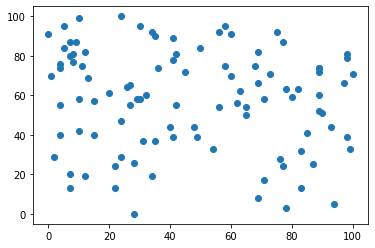

In [9]:
from sklearn.cluster import KMeans

X1 = [random.randint(0,100) for _ in range(100)]
X2 = [random.randint(0,100) for _ in range(100)]

plt.scatter(X1,X2)

training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]
cluster = KMeans(n_clusters=6,max_iter=500)
cluster.fit(training_data)

In [10]:
cluster.cluster_centers_

array([[45.07692308, 85.23076923],
       [ 8.        , 82.9375    ],
       [29.        , 49.9047619 ],
       [84.07692308, 24.        ],
       [78.5       , 67.        ],
       [17.27272727, 21.09090909]])

In [11]:
cluster.labels_

array([2, 4, 0, 1, 2, 1, 0, 2, 5, 3, 4, 1, 3, 4, 5, 4, 2, 3, 0, 1, 0, 1,
       2, 2, 5, 3, 4, 3, 4, 2, 0, 4, 5, 2, 0, 2, 5, 4, 3, 1, 0, 0, 5, 2,
       3, 1, 5, 0, 4, 4, 4, 2, 1, 5, 1, 2, 0, 1, 2, 4, 4, 1, 1, 1, 4, 4,
       5, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 3, 5, 3, 3, 1, 3, 4, 0, 1, 2,
       1, 0, 0, 3, 2, 2, 5, 4, 2, 4, 4, 3])

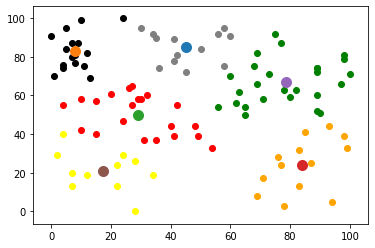

In [12]:
from collections import defaultdict

centers = defaultdict(list)

for label,location in zip(cluster.labels_,training_data):
    centers[label].append(location)
    
color = ['red','green','grey','black','yellow','orange']

for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: Model is abstract,formularized description of how things work / mechanical explanation of certain phenomenon. It uses features to predict a target. 

Because in reality there are numerous factors/features that could affect the turn-out of the predicted target, but not all of them are useful or important to solve the current problem, namely predicting new cases with currently available knowledge. Some feature are too trivial or irrelevant to predict the target, or their relationships with the target are too complicated or confounded, that cannot be easily found out with current knowledge, therefore they are less concerned and should not be included into the model.

All the models are some simplified version or miniature of some real systems, which means they ignore some aspects or levels of details / factors. But, some models are very effective in predicting new cases of the target, with better performance than predicting by chance or by previous models. Then these are useful models.

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: underfitting means the model is too simple to capture the main characteristics of the data, which leads to poor performance in both training & test datasets; overfitting means the model captures not only the main structure of the data but also the trivial features in the dataset (training dataset) which cannot be generalized to another similar dataset (test dataset), therefore leads to good performance in training dataset but poor performance in test dataset.

The reasons for underfitting: model is too simple, for example, if the true relationship between x & y follows some higher order of polynomials e.g. y = x^3, if we use linear regression to fit the data, we would get poor performance because when x gets further from zero, the y clearly deviates heavier from the predicted y (only when x is in the small range around zero, linear regression could be a reasonable approximate).

The reason for overfitting: model is too complicated so that it also captures noise in the training dataset, which is not replicated in the test dataset. 

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: TP: True Positive; TN: True Negative; FP: False Positive; FN: False Negative

precision = TP / (TP + FP)
recall = TP / (TP + FN)

AUC: Area Under Curve (Receiver Operating Characteristic Curve); if we have two distributions to discriminate, e.g. tagged as - & +. The further they are apart form each other, the better they could be discriminated. It is independent from where to draw the decision line / threshold. In fact we could draw the threshold from left to right many times. Each time we would get a TP & a FP value, & we plot it on the ROC (x: FP, y: TP). if the two distributions are totally overlapped & cannot be discriminated, the AUC of ROC is close to 50/50, otherwise the further the two distributions away from each other, the value of AUC is closer to 1.


F1 & F2 scores are weighted average of precision & recall, they both folow:

(1+beta^2) * precision * recall / (beta^2 * precision + recall)

F1-score sets beta=1: F1 = 2 * (precision * recall) / (precision + recall) 

F2-score sets beta = 2

set beta > 1 gives more weight to precision, set 0<beta<1 gives more weight to recall.

precision 查准率衡量的是一个模型判断为positive阳性的样本里面有多少是正确的,它的侧重点是控制假阳性（查准率高 --> 假阳性低）。比如法院在判决犯人的时候要尽可能避免误判（就是秉承“宁可漏网不可冤枉”，而不是“宁可错杀千人不可放过一个”的原则），出发的点是“无罪”，然后再通过证据证明在无罪的前提下事件发生的可能性极低来推翻原假设。而recall检出率衡量的是有多少实际上为阳性的样本能够被模型检测出的概率，它的侧重点是不要有“漏网之鱼”，比如这次疫情，有疑似症状的需要尽早隔离进一步诊断医治（尽管并不一定是被新冠病毒感染的患者）。一个合理的模型需要 precision & recall 都高，但是根据实际需求不同，侧重点会不同，看哪一个更重要、更迫切。

AUC 完全由数据的数值分布决定，与划分阴性/阳性的决策分界线无关。但是模型可以通过学习调整其参数来 maximize AUC,使得所选features组合对两类样本由最高的区分度。

F-meaurements (F1,F2-scores) are weighted average of precision & recall. 综合考虑了查准率和检出率，且通过调整beta值可以调整二者的比重。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 机器学习就是让程序自己通过数据来提炼出有用的规则，也就是通过data-driven 的方式构建可以解释和预测新数据的模型。而传统的分析式编程是靠人写入一条一条判断规则/判定语句，也就是模型的参数等细节是写死的，但是人的认知有限人不是上帝数据背后的规则不是按照人定的规则产生的，一旦真实数据发生一些变化就要重新修改代码，然而机器学习不用。在机器学习当中人需要提供的只是一个大的框架，即要实现的目标是什么（分类？估值？），可提供的相关数据有哪些（features), 按照大致一个什么思路/算法进行，以及对输出结果设定什么样的评价标准，衡量模型的好坏。这一套流程非常具有普适性，不会因为具体数据发生变化而改变。变的是模型在学习的过程当中根据数据自身做的调整（学习到的参数等等）。所以机器学习程序的代码不用跟着数据改（尽管也不是绝对的普适），有足够的灵活性自适应到具体的数据产生合适的模型。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

机器学习这么实用的学科，当然是“关键看效果”。但是效果这么抽象一个词，它可能意味着很多事情。如果只是含糊其词、摸棱两可，会严重影响最后对模型优劣的判断（是否该模型可以采纳）。比如一个几千几万样本的数据集里只有几例 positive cases，如果按照accuracy来评价，再烂的分类器也会有很高的正确率，显然是个错误的选择。所以首先要量化好“效果”，确定评价标准是什么，比如检出率和查准率哪个更重要？或者正确率、检出率、查准率等等performance差不多的情况下，也需要尽可能选择更加简单的模型（计算BIC,AIC,etc.) 。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [17]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return -sum(p * np.log(p) for p in probs)

def find_the_optimal_spliter(training_data:pd.DataFrame,target:str) -> str:
    
    feature_names = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in feature_names:
        values = set(training_data[f])
        for v in values:
            sub_split1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_split1)
            
            sub_split2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_split2)
            
            entropy_v = entropy_1 + entropy_2
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
                
#     print('the best spliter is: {}'.format(spliter))
#     print("the min entropy is: {}".format(min_entropy))
        
    return spliter

In [105]:
# you code here

import statistics

def tree(dataset:pd.DataFrame,target='bought'):
    
    features = set(dataset.columns.tolist()) - {target}
    
    labels = dataset[target]
    classes = np.unique(labels)
    counts = Counter(labels)
    probs = [counts[c]/len(labels) for c in classes]
#     print(probs)  
    
    if len(features) == 0 or len(set(labels)) == 1:
        bought = classes[np.where(probs==np.max(probs))][0] # statistics.mode(labels)
#         print("bought = {}\n".format(bought))
        return bought
        
    else:
        best_spliter = find_the_optimal_spliter(dataset,target)[0]
#         print(best_spliter)
    
        values = set(dataset[best_spliter])
        
        dc = {best_spliter:{}}

        for v in values:
#             print((best_spliter,v))
            subset = dataset[dataset[best_spliter]==v]
            subset = subset.drop(best_spliter,1)
#             print(subset)
            if not subset.empty: 
                dc[best_spliter][v] = tree(subset)
        return dc

                  
ctree = tree(dataset)     


def predicate(gender,income,family_number,tree=ctree):
    
    input_vals = [gender,income,family_number]
    
    feature_list = ['gender','income','family_number']
    
    root_node = list(tree.keys())[0]
    
    root_node_idx = [idx for idx,v in enumerate(feature_list) if v==root_node][0]
    
    root_val = input_vals[root_node_idx]
    
    print("{} : {}".format(root_node,root_val))
    
    divisions = tree[root_node]
    
    branch = divisions[root_val]
    
    if isinstance(branch,dict):
        print(branch)
        c = predicate(gender,income,family_number,tree=branch)
    else:
        c = divisions[root_val]
        
    return c


print(predicate('M','+10',1), '\n\n')

predicate('M','-10',1)

income : +10
{'family_number': {1: {'gender': {'F': 0, 'M': 0}}, 2: 1}}
family_number : 1
{'gender': {'F': 0, 'M': 0}}
gender : M
0 


income : -10


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [6]:
# you code here
import numpy as np

def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for xi,yi,y_hati in zip(list(x),list(y),list(y_hat)):
        gradient += np.sign(yi - y_hati) * xi
    return -1/n * gradient

def partial_b(y,y_hat):
    n = len(y)
    gradient = 0
    for yi,y_hati in zip(list(y),list(y_hat)):
        gradient += np.sign(yi - y_hati) 
    return -1/n * gradient


<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

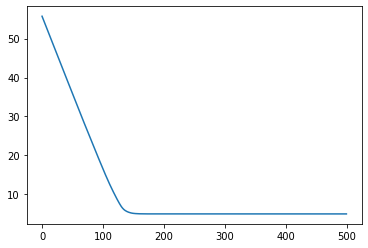

In [13]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
%matplotlib inline

dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

def price(rm, k, b):
    return k * rm + b


k = random.random() * 200 - 100  
b = random.random() * 200 - 100  

learning_rate = 1e-2

iteration_num = 500 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
#     print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

plt.plot(list(range(iteration_num)),losses)


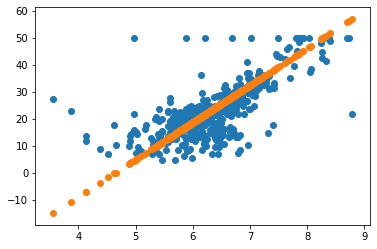

In [14]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)